In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [2]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [3]:
df = pd.read_csv('./occ_ech_1444.csv')
df['date'] = pd.to_numeric(df['date'])

In [4]:
ls_auth = df['authority'].unique()

In [5]:
df

,authority,date,role,represents,represents_in
0,aves_aa_4R_auth_1093,1444,group_50,NaN,group_30
1,aves_aa_4R_auth_1092,1444,group_50,NaN,group_12
2,aves_aa_4R_auth_1091,1444,group_50,NaN,group_12
3,aves_aa_4R_auth_1090,1444,group_50,NaN,group_12
4,aves_aa_4R_auth_1089,1444,group_50,NaN,group_12
...,...,...,...,...,...
1172,aves_aa_4R_auth_0075,1409,group_49,group_27,group_01
1173,aves_aa_4R_auth_0075,1412,group_49,group_27,group_01
1174,aves_aa_4R_auth_0075,1422,group_49,group_27,group_01
1175,aves_aa_4R_auth_0075,1434,group_49,group_27,group_01


In [6]:
df_out = pd.DataFrame(columns = ['id', 'corporation', 'poele|metier', 'am', 'am_av_1444', 'am_ap_1444', 'cons', 'cons_av_1444',
                                     'cons_ap_1444', 'total'])
for element in ls_auth :
    subdf = df.loc[df['authority'] == element]
    dic = {}
    
    dic['id'] = element
    dic['am_av_1444'] = 0
    dic['am_ap_1444'] = 0
    dic['cons_av_1444'] = 0
    dic['cons_ap_1444'] = 0
    
    for index, row in subdf.iterrows() :
        
        if row['role'] == 'group_50' :
            #df_out['corporation'] = row['represents_in']
            dic['corporation'] = row['represents_in']
            
            if pd.isna(row['represents']) == False :
                #df_out['poele|metier'] = row['represents']
                dic['poele|metier'] = row['represents']
                
                

            
    av1444 = subdf.loc[subdf['date'] <= 1444]
    
    if 'group_48' in av1444['role'].values:
        dic['am_av_1444'] = av1444['role'].value_counts()['group_48']
    
    if 'group_49' in av1444['role'].values:
        dic['cons_av_1444'] = av1444['role'].value_counts()['group_49']

    
    ap1444 = subdf.loc[subdf['date'] > 1444]
    
    if 'group_48' in ap1444['role'].values:
        dic['am_ap_1444'] = ap1444['role'].value_counts()['group_48']
    
    if 'group_49' in ap1444['role'].values:
        dic['cons_ap_1444'] = ap1444['role'].value_counts()['group_49']
    
    dic['am'] = dic['am_av_1444'] + dic['am_ap_1444']
    dic['cons'] = dic['cons_av_1444'] + dic['cons_ap_1444']
    dic['total'] = dic['am'] + dic['cons']
    df_out = df_out.append(dic, ignore_index=True)

In [7]:
df_out['cons'] = df_out['cons'].astype(int)
df_out['am'] = df_out['am'].astype(int)

In [8]:
df_out

,id,corporation,poele|metier,am,am_av_1444,am_ap_1444,cons,cons_av_1444,cons_ap_1444,total
0,aves_aa_4R_auth_1093,group_30,NaN,0,0,0,0,0,0,0
1,aves_aa_4R_auth_1092,group_12,NaN,0,0,0,0,0,0,0
2,aves_aa_4R_auth_1091,group_12,NaN,0,0,0,0,0,0,0
3,aves_aa_4R_auth_1090,group_12,NaN,0,0,0,0,0,0,0
4,aves_aa_4R_auth_1089,group_12,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
373,aves_aa_4R_auth_0134,group_05,group_44,0,0,0,3,3,0,3
374,aves_aa_4R_auth_0130,group_23,group_45,0,0,0,7,7,0,7
375,aves_aa_4R_auth_0112,group_19,NaN,0,0,0,8,8,0,8
376,aves_aa_4R_auth_0081,group_06,NaN,3,3,0,15,13,2,18


In [9]:
df_out = df_out.replace(['group_05', 'group_06', 'group_07', 'group_08', 'group_09', 'group_10', 'group_11', 'group_12', 
                'group_13', 'group_14', 'group_15', 'group_16', 'group_17', 'group_18', 'group_19', 'group_20', 
                'group_21', 'group_22', 'group_23', 'group_24', 'group_25', 'group_26', 'group_27', 'group_28', 
                'group_29', 'group_30', 'group_31', 'group_32'],
               ['marchands', 'boulangers', 'bouchers', 
                'tonneliers', 'drapiers', 'tanneurs', 
                'cabaretiers', 'maçons', 'forgerons', 
                'tailleurs', 'bateliers', 'pelletiers', 
                'charpentiers', 'crieurs et mesureurs de vin', 
                'cordonniers', 'orfèvres', 'marchands de grains', 
                'jardiniers', 'pêcheurs', 'barbiers et baigneurs', 
                'sauniers', 'tisserands', 'gourmets et courtiers', 
                'charrons', 'regrattiers, cordiers et fruitiers', 
                'coltineurs de tonneaux', 'constructeurs de bateaux', 
                'huiliers meuniers et tondeurs de draps'])

In [10]:
df_out

,id,corporation,poele|metier,am,am_av_1444,am_ap_1444,cons,cons_av_1444,cons_ap_1444,total
0,aves_aa_4R_auth_1093,coltineurs de tonneaux,NaN,0,0,0,0,0,0,0
1,aves_aa_4R_auth_1092,maçons,NaN,0,0,0,0,0,0,0
2,aves_aa_4R_auth_1091,maçons,NaN,0,0,0,0,0,0,0
3,aves_aa_4R_auth_1090,maçons,NaN,0,0,0,0,0,0,0
4,aves_aa_4R_auth_1089,maçons,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
373,aves_aa_4R_auth_0134,marchands,group_44,0,0,0,3,3,0,3
374,aves_aa_4R_auth_0130,pêcheurs,group_45,0,0,0,7,7,0,7
375,aves_aa_4R_auth_0112,cordonniers,NaN,0,0,0,8,8,0,8
376,aves_aa_4R_auth_0081,boulangers,NaN,3,3,0,15,13,2,18


In [11]:
df_out2 = pd.DataFrame(columns = ['id', 'corporation', 'poele|metier', "mandat d'ammeistre", 'mandat de conseiller', 'époque', 'total'])

for index, row in df_out.iterrows():
    dic = {}
    dic2 = {}
    dic['id'] = row['id']
    dic2['id'] = row['id']
    dic['corporation'] = row['corporation']
    dic2['corporation'] = row['corporation']
    dic['poele|metier'] = row['poele|metier']
    dic2['poele|metier'] = row['poele|metier']
    
    dic["mandat d'ammeistre"] = row['am_av_1444']
    dic['époque'] = "avant 1444"
    dic2["mandat d'ammeistre"] = row['am_ap_1444']
    dic2['époque'] = "après 1444"
    
    dic['mandat de conseiller'] = row['cons_av_1444']
    dic['époque'] = "avant 1444 (1444 inclus)"
    dic2['mandat de conseiller'] = row['cons_ap_1444']
    dic2['époque'] = "après 1444"
    
    dic['total'] = dic["mandat d'ammeistre"] + dic['mandat de conseiller']
    dic2['total'] = dic2["mandat d'ammeistre"] + dic2['mandat de conseiller']
    
    df_out2 = df_out2.append(dic, ignore_index=True)
    df_out2 = df_out2.append(dic2, ignore_index=True)

In [12]:
df_out2['mandat de conseiller'] = df_out2['mandat de conseiller'].astype(int)
df_out2["mandat d'ammeistre"] = df_out2["mandat d'ammeistre"].astype(int)
df_out2

,id,corporation,poele|metier,mandat d'ammeistre,mandat de conseiller,époque,total
0,aves_aa_4R_auth_1093,coltineurs de tonneaux,NaN,0,0,avant 1444 (1444 inclus),0
1,aves_aa_4R_auth_1093,coltineurs de tonneaux,NaN,0,0,après 1444,0
2,aves_aa_4R_auth_1092,maçons,NaN,0,0,avant 1444 (1444 inclus),0
3,aves_aa_4R_auth_1092,maçons,NaN,0,0,après 1444,0
4,aves_aa_4R_auth_1091,maçons,NaN,0,0,avant 1444 (1444 inclus),0
...,...,...,...,...,...,...,...
751,aves_aa_4R_auth_0112,cordonniers,NaN,0,0,après 1444,0
752,aves_aa_4R_auth_0081,boulangers,NaN,3,13,avant 1444 (1444 inclus),16
753,aves_aa_4R_auth_0081,boulangers,NaN,0,2,après 1444,2
754,aves_aa_4R_auth_0075,gourmets et courtiers,NaN,0,5,avant 1444 (1444 inclus),5


In [13]:
my_order = df_out2.groupby(by=["corporation"])["mandat de conseiller"].sum().sort_values(ascending=False).index
ls_ylabels = my_order.to_list()

In [14]:
ls_ylabels

['boulangers',
 'bateliers',
 'marchands',
 'bouchers',
 'tisserands',
 'sauniers',
 'marchands de grains',
 'tonneliers',
 'tanneurs',
 'charrons',
 'forgerons',
 'tailleurs',
 'charpentiers',
 'regrattiers, cordiers et fruitiers',
 'jardiniers',
 'barbiers et baigneurs',
 'gourmets et courtiers',
 'pelletiers',
 'drapiers',
 'huiliers meuniers et tondeurs de draps',
 'cordonniers',
 'coltineurs de tonneaux',
 'maçons',
 'pêcheurs',
 'constructeurs de bateaux',
 'cabaretiers',
 'orfèvres',
 'crieurs et mesureurs de vin']

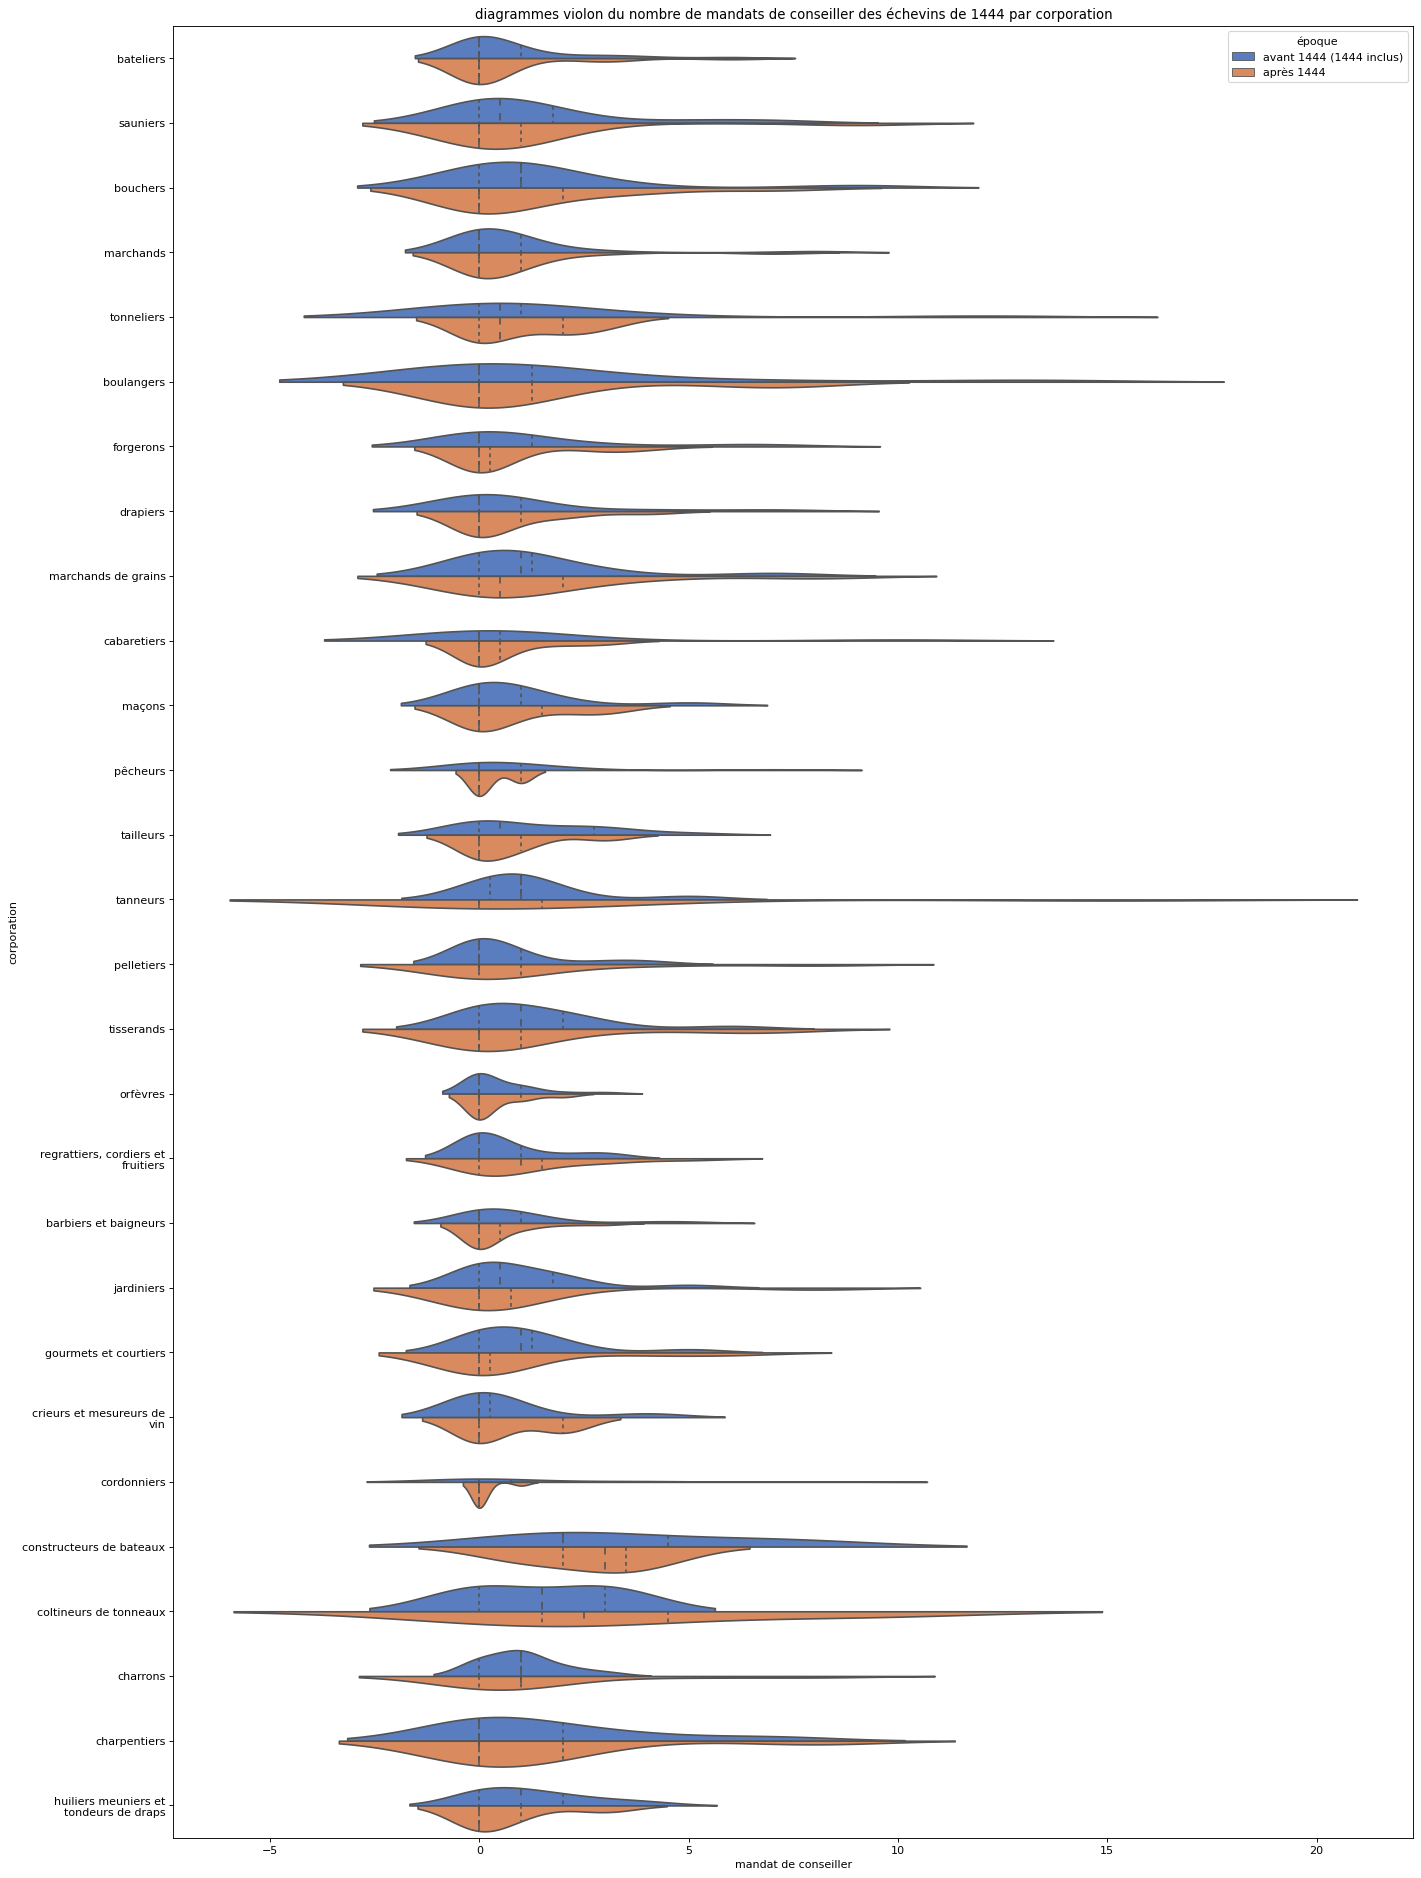

In [43]:
plt.figure(figsize=(20, 30), dpi=80)
violinplot_cons = sns.violinplot(y="corporation", x="mandat de conseiller", hue="époque", data=df_out2, 
                                 inner='quartile', order = my_order, palette="muted", split=True)
wrap_labels(violinplot_cons, 25)
violinplot_cons.set_title('diagrammes violon du nombre de mandats de conseiller des échevins de 1444 par corporation', loc='center')
fig = violinplot_cons.get_figure()
fig.savefig('violinplot_cons.svg', format='svg')

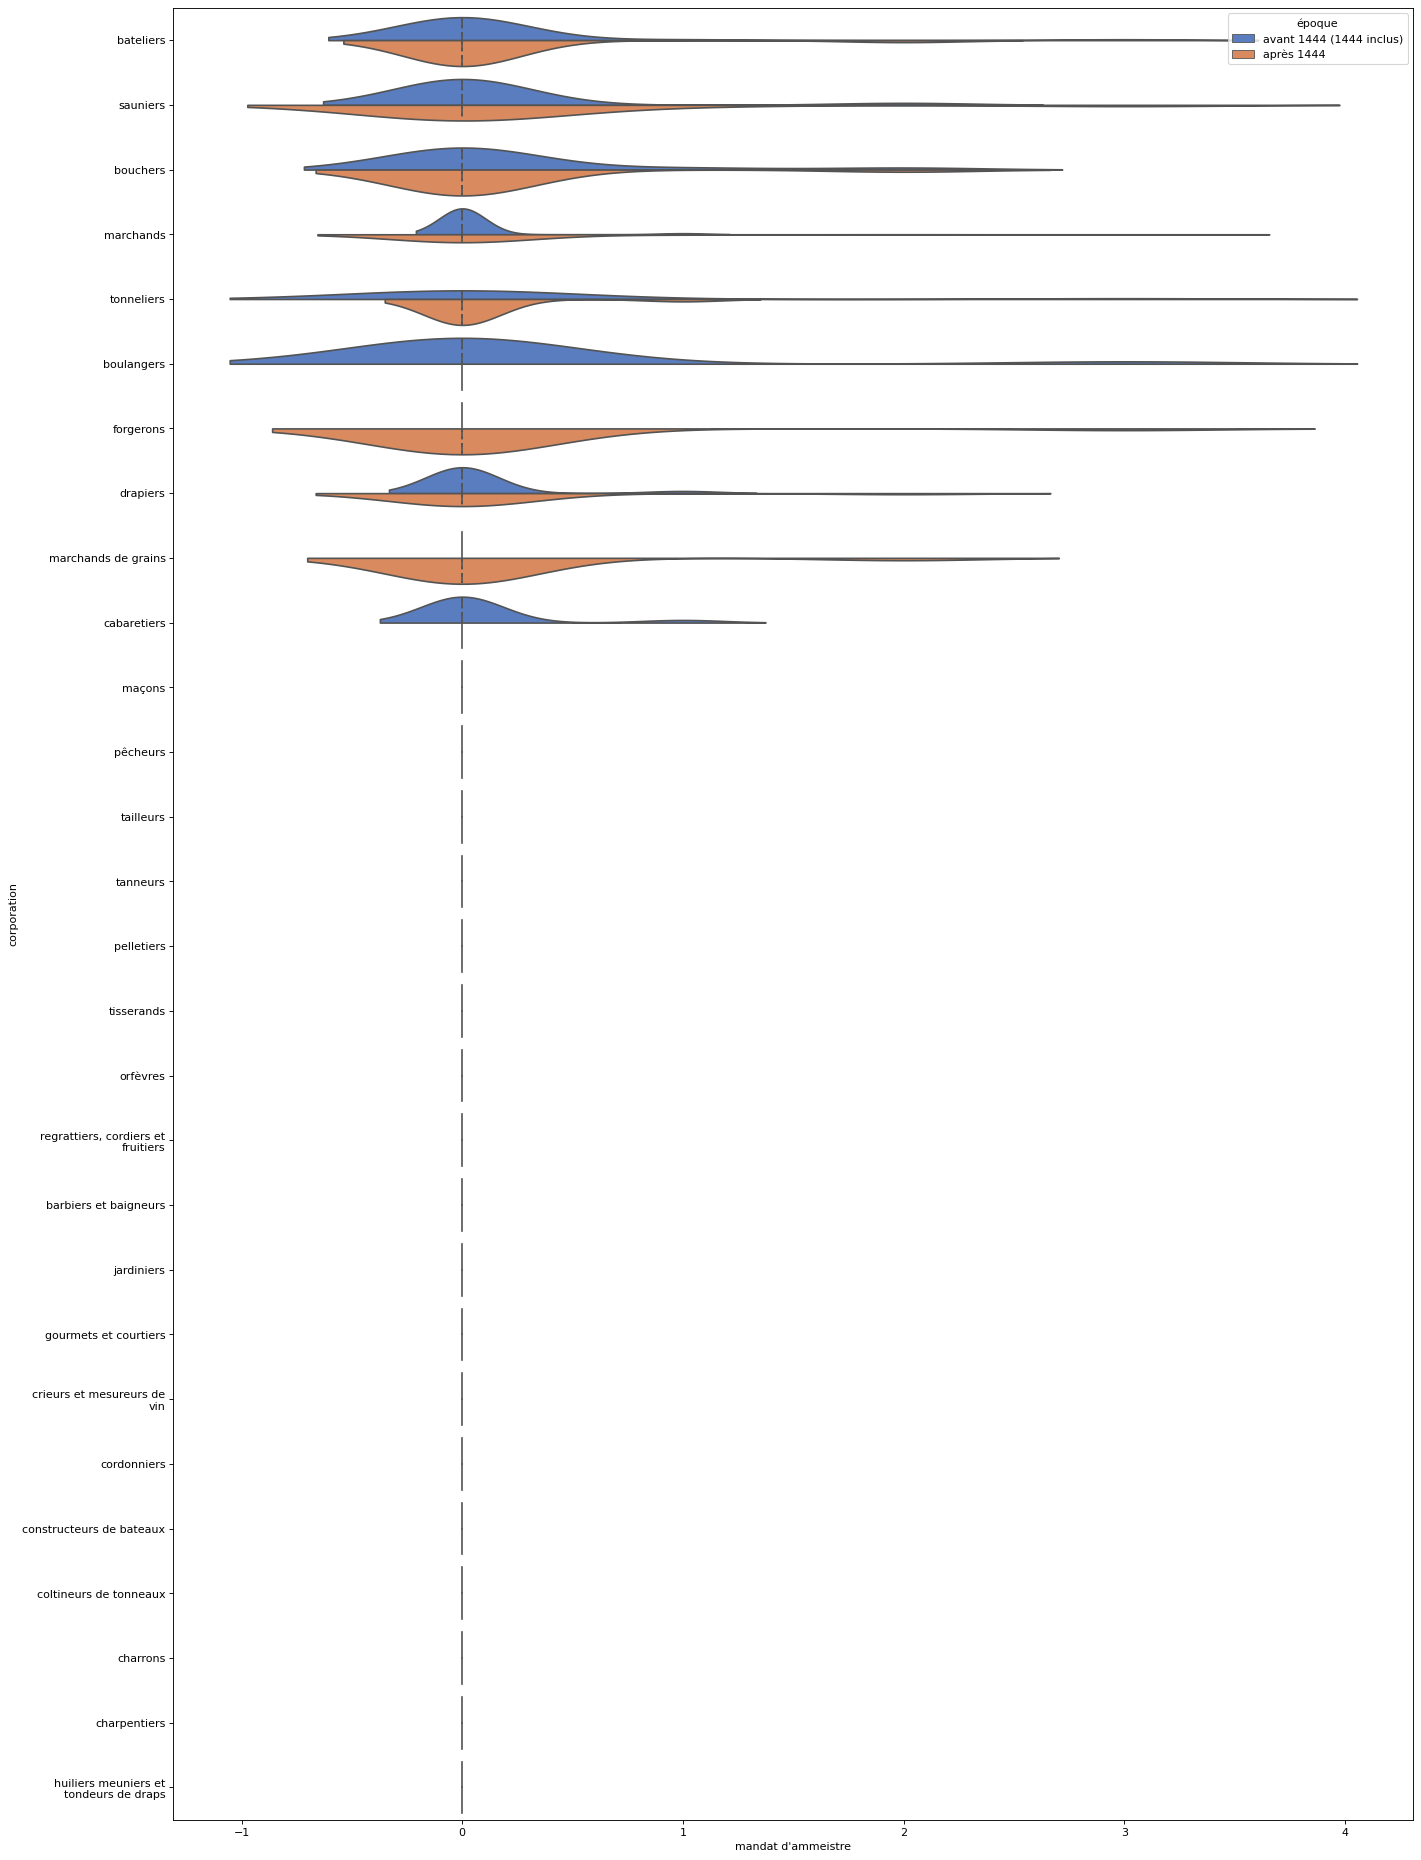

In [16]:
plt.figure(figsize=(20, 30), dpi=80)
my_order = df_out2.groupby(by=["corporation"])["mandat d'ammeistre"].sum().sort_values(ascending=False).index
violinplot_am = sns.violinplot(y="corporation", x="mandat d'ammeistre", hue="époque", data=df_out2, 
                                 inner='quartile', order = my_order, palette="muted", split=True)
wrap_labels(violinplot_am, 25)
violinplot_cons.set_title("diagrammes violon du nombre de mandats d'ammeistre des échevins de 1444 par corporation", loc='center')
fig = violinplot_am.get_figure()
fig.savefig('violinplot_am.svg', format='svg')show

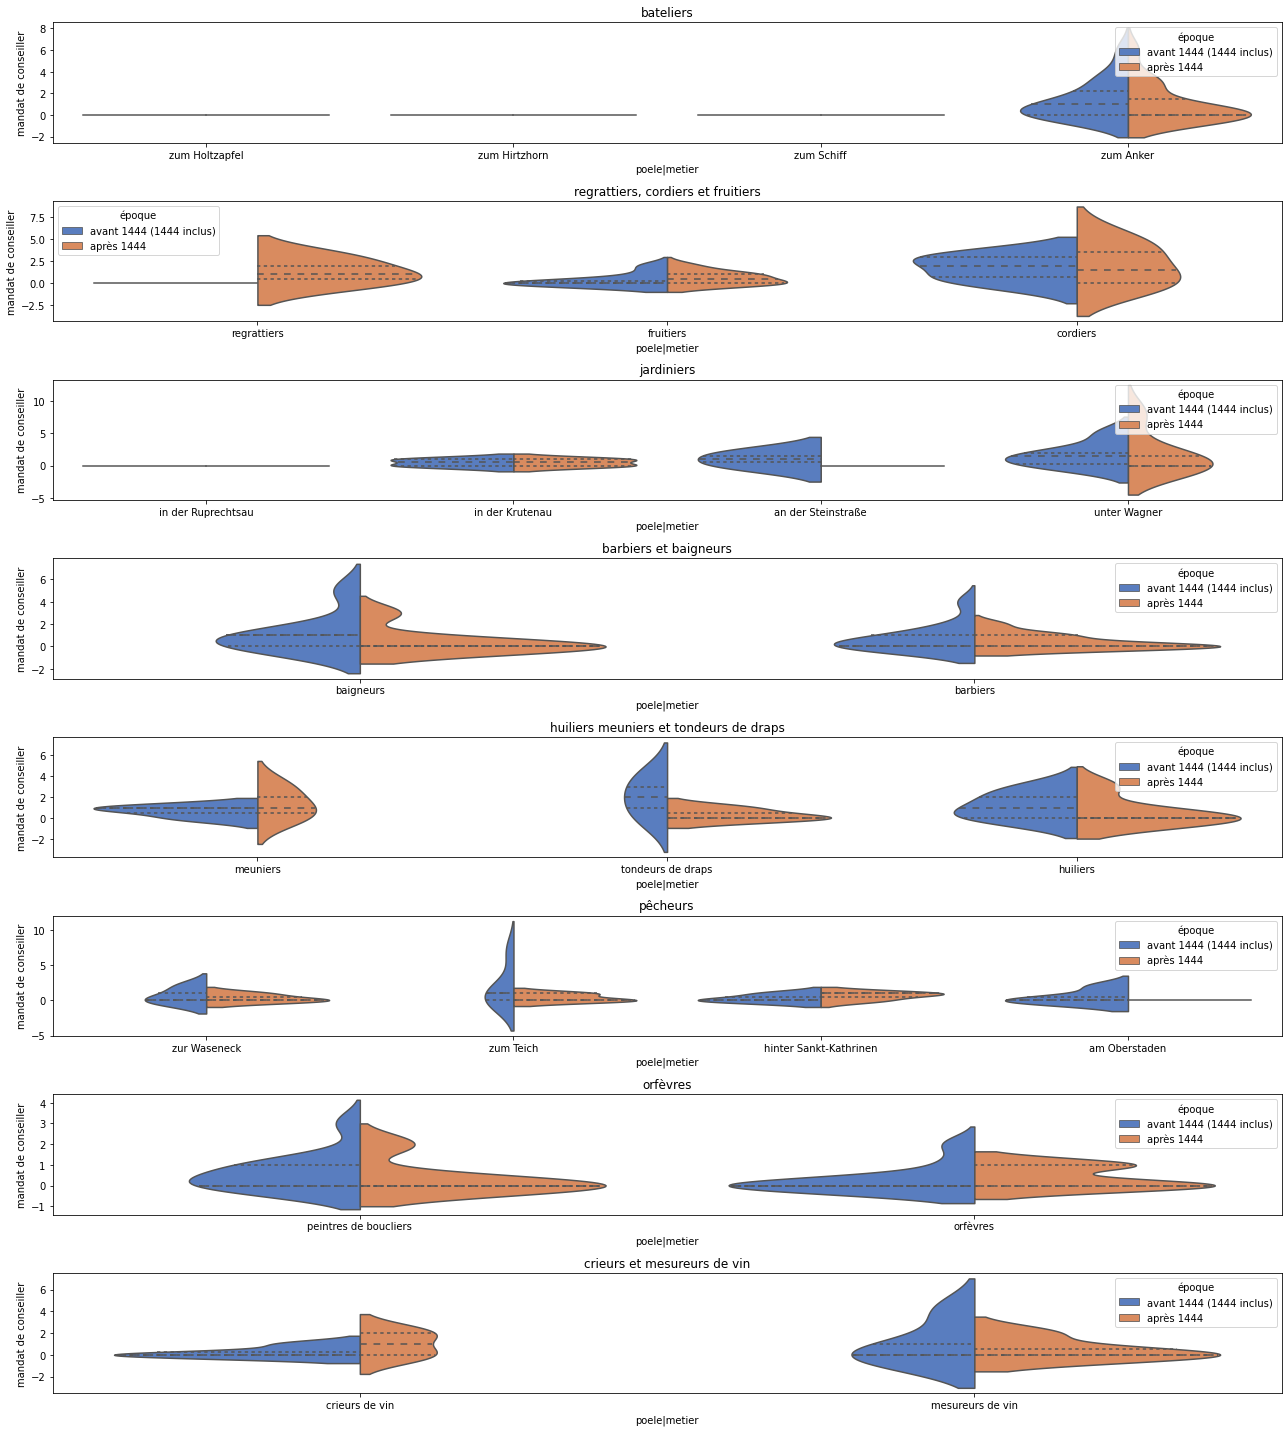

In [117]:
df_out2 = df_out2.replace(['group_39', 'group_43', 'group_41', 'group_42', 'group_44', 'group_46', 
                         'group_40', 'group_71', 'group_72', 'group_69', 'group_66', 'group_64',
                         'group_63', 'group_68', 'group_74', 'group_70', 'group_33', 'group_35',
                         'group_45', 'group_47', 'group_38', 'group_34', 'group_36', 'group_37',
                         'group_65', 'group_67', 'group_73', 'group_55'],
               ['zum Anker', 'zum Schiff', 'zum Hirtzhorn', 'zum Holtzapfel', 'zum Spiegel', 'zur Blume',
                'zum Friburger', 'orfèvres', 'peintres de boucliers', 'mesureurs de vin', 'crieurs de vin', 'barbiers',
                'baigneurs', 'huiliers', 'tondeurs de draps', 'meuniers', 'am Oberstaden', 'hinter Sankt-Kathrinen',
                'zum Teich', 'zur Waseneck', 'unter Wagner', 'an der Steinstraße', 'in der Krutenau', 'in der Ruprechtsau',
                'cordiers', 'fruitiers', 'regrattiers', 'carreleurs'])

fig, axes = plt.subplots(8, figsize=(18, 20))

axx = 0
for element in ls_ylabels :
    df = df_out2[df_out2['corporation'] == element]
    if df['poele|metier'].nunique() > 1 : 
        sns.violinplot(ax = axes[axx], x='poele|metier', y = 'mandat de conseiller', hue = 'époque',
               data = df, inner='quartile', palette="muted", split=True)
        axes[axx].title.set_text(element)
        axx = axx + 1
    
plt.tight_layout()

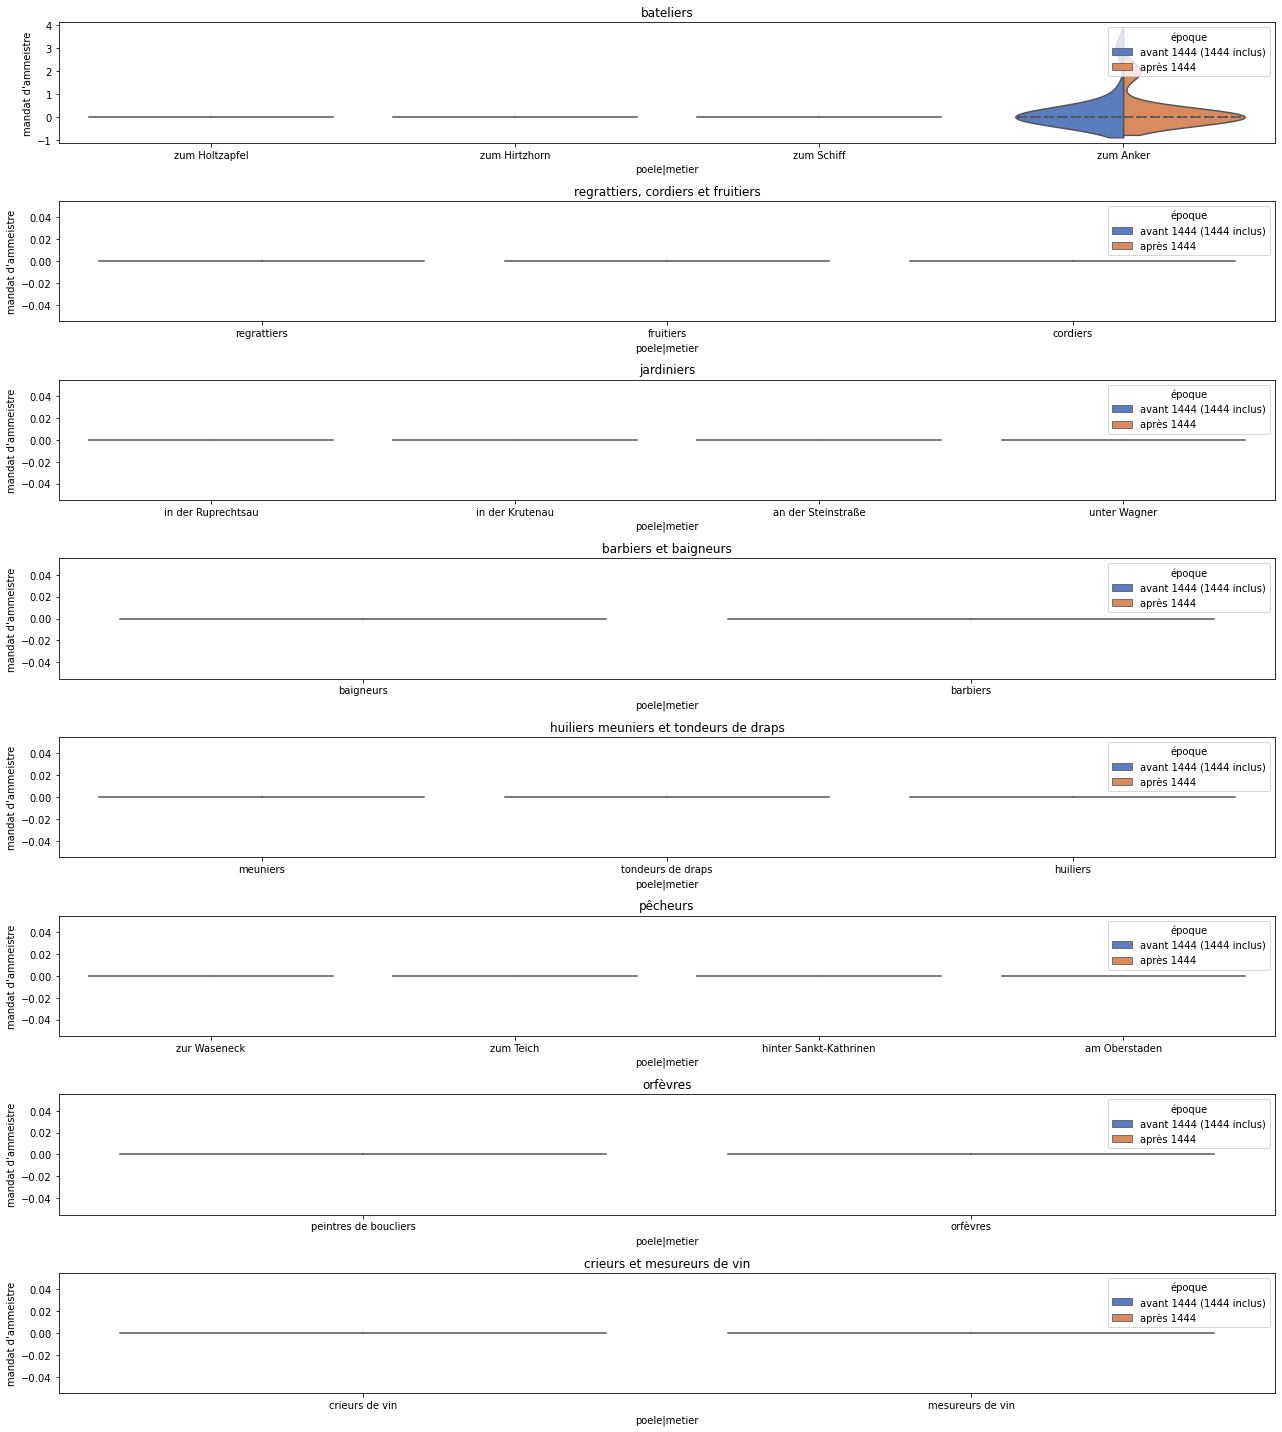

In [118]:
fig, axes = plt.subplots(8, figsize=(18, 20))

axx = 0
for element in ls_ylabels :
    df = df_out2[df_out2['corporation'] == element]
    if df['poele|metier'].nunique() > 1 : 
        sns.violinplot(ax = axes[axx], x='poele|metier', y = "mandat d'ammeistre", hue = 'époque',
               data = df, inner='quartile', palette="muted", split=True)
        axes[axx].title.set_text(element)
        axx = axx + 1
    
plt.tight_layout()

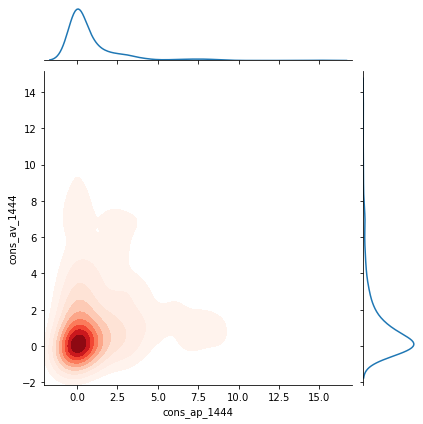

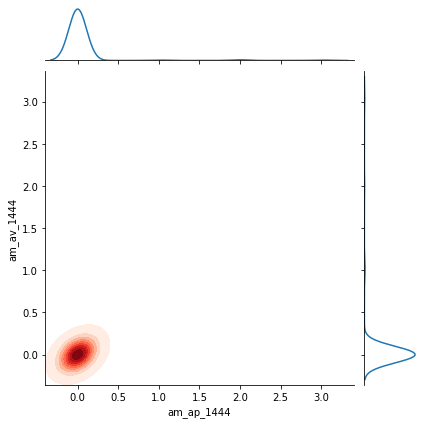

In [124]:
sns.jointplot(x=df_out.cons_ap_1444, y=df_out.cons_av_1444, cmap="Reds", shade=True, kind='kde')
sns.jointplot(x=df_out.am_ap_1444, y=df_out.am_av_1444, cmap="Reds", shade=True, kind='kde')



/tmp/ipykernel_89007/2676901605.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'cons_ap_1444', 'cons_av_1444', "", data=df_out, linestyle='', marker='o', markersize=0.7)
/tmp/ipykernel_89007/2676901605.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'am_ap_1444', 'am_av_1444', "", data=df_out, linestyle='', marker='o', markersize=0.7)


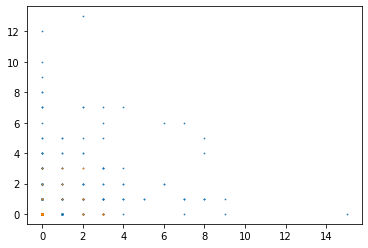

In [125]:
plt.plot( 'cons_ap_1444', 'cons_av_1444', "", data=df_out, linestyle='', marker='o', markersize=0.7)
plt.plot( 'am_ap_1444', 'am_av_1444', "", data=df_out, linestyle='', marker='o', markersize=0.7)